# LTV estimation

This notebook demonstrates LTV estimation using the [shifted beta geometric retention model](https://faculty.wharton.upenn.edu/wp-content/uploads/2012/04/Fader_hardie_jim_07.pdf).

In [21]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# suppress warnings
import warnings
warnings.filterwarnings('ignore')

### Create observed retention table

[Data source](https://doc.lagout.org/Others/Data%20Mining/Data%20Mining%20Techniques_%20For%20Marketing%2C%20Sales%2C%20and%20Customer%20Support%20(2nd%20ed.)%20%5BBerry%20%26%20Linoff%202004-04-09%5D.pdf#page=416)

In [9]:
# create time (x) and observed overall retention (s) variables
x = np.arange(0, 13, 1)
s = [1, 0.839, 0.733, 0.653, 0.593, 0.551, 0.517, 0.491, 0.468, 0.445, 0.427, 0.409, 0.394]

In [11]:
# create instantaneous retention (r) from overall retention (s): R(t) = S(t) / S(t-1)
r = [np.nan]
for counter, i in enumerate(s):
    if counter > 0:
        r.append(round(i/s[counter-1], 3))

### Define and fit the shifted beta geometric model

In [ ]:
# define shifted beta geometric function
from scipy.optimize import curve_fit
def sBG_function(x, a, b):
    return (b + x - 1) / (a + b + x - 1)

In [48]:
# fit sBG model to (first half of) instantanous retention (r) data 
limit = 7
popt_sBG, pcov = curve_fit(sBG_function, x[1:limit+1], r[1:limit+1], absolute_sigma=False, maxfev=1000)
print('alpha = ', round(popt_sBG[0], 2), '\nbeta = ', round(popt_sBG[1], 2))

alpha =  0.54 
beta =  2.76


In [49]:
# create dataframe with overall retention S(t) and instantaneous retention R(t)
pred_sBG = pd.DataFrame({'Time': x,
                         'S_obs': s,
                         'R_obs': r,
                         'R_pred': sBG_function(x, popt_sBG[0], popt_sBG[1]).round(3)})
pred_sBG['R_pred'].iloc[0] = np.nan
pred_sBG['S_pred'] = pred_sBG['R_pred'].cumprod().round(3)
pred_sBG['S_pred'].iloc[0] = 1
pred_sBG

Time  S_obs  R_obs  R_pred  S_pred
0      0  1.000    NaN     NaN   1.000
1      1  0.839  0.839   0.836   0.836
2      2  0.733  0.874   0.874   0.731
3      3  0.653  0.891   0.898   0.656
4      4  0.593  0.908   0.914   0.600
5      5  0.551  0.929   0.926   0.555
6      6  0.517  0.938   0.935   0.519
7      7  0.491  0.950   0.942   0.489
8      8  0.468  0.953   0.948   0.464
9      9  0.445  0.951   0.952   0.441
10    10  0.427  0.960   0.956   0.422
11    11  0.409  0.958   0.959   0.405
12    12  0.394  0.963   0.962   0.389

### Plot retention with sBG model

In [50]:
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

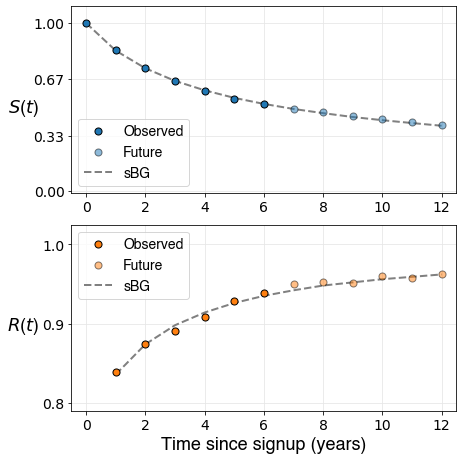

In [51]:
# plot retention forecasting
fig, axes = plt.subplots(2, 1, figsize = (6.5, 6.5))

axes[0].scatter(pred_sBG['Time'][:limit], pred_sBG['S_obs'][:limit], s=50, c=colors[0], edgecolors='k', label='Observed', zorder=2)
axes[0].scatter(pred_sBG['Time'][limit:], pred_sBG['S_obs'][limit:], s=50, c=colors[0], edgecolors='k', alpha=0.5, label='Future', zorder=2)
axes[0].plot(pred_sBG['Time'], pred_sBG['S_pred'], '--', linewidth=2, c='gray', zorder=1, label='sBG')
axes[0].set_xlim(-0.5, 12.5)
axes[0].set_ylim(-0.01,1.1)
axes[0].set_yticks([0, 0.33, 0.67, 1.0])
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_ylabel('$S$($t$)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold', rotation=0)
axes[0].get_yaxis().set_label_coords(-0.125,0.4)

axes[1].scatter(pred_sBG['Time'][:limit], pred_sBG['R_obs'][:limit], s=50, c=colors[1], edgecolors='k', label='Observed', zorder=2)
axes[1].scatter(pred_sBG['Time'][limit:], pred_sBG['R_obs'][limit:], s=50, c=colors[1], edgecolors='k', alpha=0.5, label='Future', zorder=2)
axes[1].plot(pred_sBG['Time'], pred_sBG['R_pred'], '--', linewidth=2, c='gray', zorder=1, label='sBG')
axes[1].legend(loc=2, prop={'size': 14, 'family':'Helvetica'})
axes[1].set_xlim(-0.5, 12.5)
axes[1].set_ylim(0.79,1.025)
axes[1].set_yticks([0.8, 0.9, 1.0])
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_ylabel('$R$($t$)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold', rotation=0)
axes[1].get_yaxis().set_label_coords(-0.125,0.4)

handles, labels = axes[0].get_legend_handles_labels()
handles = [handles[1], handles[2], handles[0]]
labels = [labels[1], labels[2], labels[0]]
axes[0].legend(handles, labels, loc=3, prop={'size': 14, 'family':'Helvetica'})

handles, labels = axes[1].get_legend_handles_labels()
handles = [handles[1], handles[2], handles[0]]
labels = [labels[1], labels[2], labels[0]]
axes[1].legend(handles, labels, loc=2, prop={'size': 14, 'family':'Helvetica'})

plt.xlabel('Time since signup (years)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')

# turn grid on
axes[0].grid(color=(.9, .9, .9)), axes[0].set_axisbelow(True)
axes[1].grid(color=(.9, .9, .9)), axes[1].set_axisbelow(True)

plt.tight_layout()
plt.show()

### Model retention in long term

In [64]:
# create long-term retention model based on fit
years = 100
x = np.arange(0, years+1, 1)
d = 0.10

# shifted beta geometric
pred_sBG_longterm = pd.DataFrame({'Time': x,
                                  'R_pred': sBG_function(x, popt_sBG[0], popt_sBG[1]).round(3)})
pred_sBG_longterm['R_pred'].iloc[0] = np.nan

# create overall retention (survival) column
pred_sBG_longterm['S_pred'] = pred_sBG_longterm['R_pred'].cumprod().round(3)
pred_sBG_longterm['S_pred'].iloc[0] = 1

# calculate time-discounted customer lifetime column
pred_sBG_longterm['S_pred_disc'] = (pred_sBG_longterm['S_pred']/((1 + d)**pred_sBG_longterm['Time'])).round(3)

# calculate customer lifetime as area under survival curve
pred_sBG_longterm['S_pred_disc_cumsum'] = (pred_sBG_longterm['S_pred_disc'].cumsum() - 1).round(3)

In [65]:
# check result -- converges to 4.95
pred_sBG_longterm

Time  R_pred  S_pred  S_pred_disc  S_pred_disc_cumsum
0       0     NaN   1.000        1.000               0.000
1       1   0.836   0.836        0.760               0.760
2       2   0.874   0.731        0.604               1.364
3       3   0.898   0.656        0.493               1.857
4       4   0.914   0.600        0.410               2.267
..    ...     ...     ...          ...                 ...
96     96   0.995   0.139        0.000               4.949
97     97   0.995   0.138        0.000               4.949
98     98   0.995   0.137        0.000               4.949
99     99   0.995   0.137        0.000               4.949
100   100   0.995   0.136        0.000               4.949

[101 rows x 5 columns]

### Plot long-term retention forecast

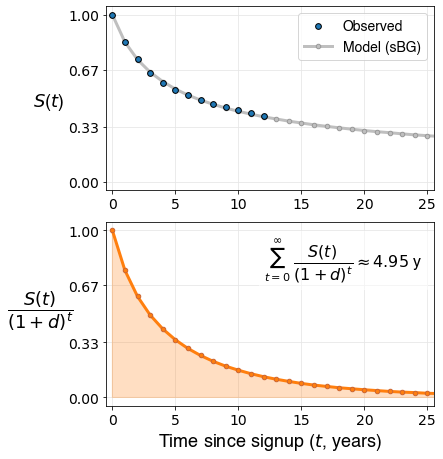

In [77]:
# plot retention forecasting
fig, axes = plt.subplots(2, 1, figsize = (6.5, 6.5))

axes[0].scatter(pred_sBG['Time'], pred_sBG['S_obs'], s=33, c=colors[0], edgecolors='k', label='Observed', zorder=2)
axes[0].plot(pred_sBG_longterm['Time'], pred_sBG_longterm['S_pred'], marker='.', markersize=9, markeredgecolor=(0.6, 0.6, 0.6), linewidth=3, c=(0.75, 0.75, 0.75), zorder=1, label='Model (sBG)')
axes[0].set_xlim(-0.5, 25.5)
axes[0].set_ylim(-0.05,1.05)
axes[0].set_yticks([0, 0.33, 0.67, 1.0])
axes[0].tick_params(axis='both', which='major', labelsize=14)
axes[0].set_ylabel('$S$($t$)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold', rotation=0)
axes[0].get_yaxis().set_label_coords(-0.175,0.425)
handles, labels = axes[0].get_legend_handles_labels()
axes[0].legend([handles[1], handles[0]], [labels[1], labels[0]], loc=1, prop={'size': 14, 'family':'Helvetica'})

axes[1].plot(pred_sBG_longterm['Time'], pred_sBG_longterm['S_pred_disc'], marker='.', markersize=9, markeredgecolor=(0.8, 0.4, 0.2), linewidth=3, c=colors[1], zorder=2) #, label='sBG')
axes[1].set_xlim(-0.5, 25.5)
axes[1].set_ylim(-0.05, 1.05)
axes[1].set_yticks([0, 0.33, 0.67, 1.0])
axes[1].tick_params(axis='both', which='major', labelsize=14)
axes[1].set_ylabel(r"$\dfrac{S(t)}{(1+d)^t}$", fontsize = 18, fontname = 'Helvetica', fontweight = 'bold', rotation=0)
axes[1].get_yaxis().set_label_coords(-0.2,0.4)
axes[1].fill_between(pred_sBG_longterm['Time'], pred_sBG_longterm['S_pred_disc'], color=colors[1], alpha=0.25)

# text box
props = dict(boxstyle='square', facecolor='white', edgecolor='white', alpha=0.5)
axes[1].text(12, 0.965, '$\sum_{t=0}^{\infty} \; \dfrac{S(t)}{(1+d)^t} \\approx 4.95 \; $y', fontsize=16, fontname='Helvetica', verticalalignment='top', bbox=props)

plt.xlabel('Time since signup ($t$, years)', fontsize = 18, fontname = 'Helvetica', fontweight = 'bold')

# turn grid on
axes[0].grid(color=(.9, .9, .9)), axes[0].set_axisbelow(True)
axes[1].grid(color=(.9, .9, .9)), axes[1].set_axisbelow(True)

plt.tight_layout()
plt.gcf().subplots_adjust(left=0.25, top=0.975, right=0.95)
plt.show()